In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency


sns.set(style="whitegrid")
team_id = 6

# Importing dataset

In [23]:
# read data, extract sample
data = pd.read_csv("Student_Performance_Factors.csv")
df = data.sample(n=1000, random_state=team_id)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
2150,19,64,Low,Medium,Yes,9,81,High,Yes,0,Medium,High,Public,Neutral,3,Yes,High School,Near,Male,62
3363,12,69,High,Low,No,7,70,Medium,Yes,1,Medium,Medium,Private,Positive,4,No,High School,Near,Male,62
5495,12,97,Low,Medium,Yes,6,79,Medium,No,1,Medium,Medium,Public,Negative,2,No,High School,Near,Male,65
3906,28,80,Medium,High,No,6,96,High,Yes,2,Low,Medium,Public,Positive,6,No,High School,Near,Male,73
2781,16,89,High,Medium,Yes,7,83,High,Yes,0,Low,High,Public,Positive,4,No,Postgraduate,Moderate,Male,70


# Data Description

| Attribute                      | Description                                                                   |
|:-------------------------------|:------------------------------------------------------------------------------|
| **Hours_Studied**              | Number of hours spent studying per week.                                      |
| **Attendance**                 | Percentage of classes attended.                                               |
| **Parental_Involvement**       | Level of parental involvement in the student's education (Low, Medium, High). |
| **Access_to_Resources**        | Availability of educational resources (Low, Medium, High).                    |
| **Extracurricular_Activities** | Participation in extracurricular activities (Yes, No).                        |
| **Sleep_Hours**                | Average number of hours of sleep per night.                                   |
| **Previous_Scores**            | Scores from previous exams.                                                   |
| **Motivation_Level**           | Student's level of motivation (Low, Medium, High).                            |
| **Internet_Access**            | Availability of internet access (Yes, No).                                    |
| **Tutoring_Sessions**          | Number of tutoring sessions attended per month.                               |
| **Family_Income**              | Family income level (Low, Medium, High).                                      |
| **Teacher_Quality**            | Quality of the teachers (Low, Medium, High).                                  |
| **School_Type**                | Type of school attended (Public, Private).                                    |
| **Peer_Influence**             | Influence of peers on academic performance (Positive, Neutral, Negative).     |
| **Physical_Activity**          | Average number of hours of physical activity per week.                        |
| **Learning_Disabilities**      | Presence of learning disabilities (Yes, No).                                  |
| **Parental_Education_Level**   | Highest education level of parents (High School, College, Postgraduate).      |
| **Distance_from_Home**         | Distance from home to school (Near, Moderate, Far).                           |
| **Gender**                     | Gender of the student (Male, Female).                                         |
| **Exam_Score**                 | Final exam score.                                                             |

# Data Cleaning

Removing duplicates

In [24]:
df = df.drop_duplicates()
df.shape

(1000, 20)

Check missing value

In [25]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               10
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      14
Distance_from_Home             8
Gender                         0
Exam_Score                     0
dtype: int64

There are $3$ categorical variables with missing values: `Teacher_Quality`, `Parental_Education_Level`, `Distance_from_Home`.

Keeping missing values will cause some bias in our analysis; therefore, we must handle them. One common way is to **Remove rows with null values**, but this way depends on the context and the importance of these rows. To see whether these rows are important, we can perform a statistical test to determine if the missing values are randomly distributed or if they have a pattern.

For the statistical test, we use **Chi-Square test** to determine if there is a significant association between two categorical variables. In this case, we are interested in understanding if the missingness of `Teacher_Quality` is associated with `Exam_Score`. In terms of statistics, we have 2 hypotheses:
\begin{cases}
H_0: \text{No Association} \\
H_1: \text{Association}
\end{cases}

Suppose our significant level is $0.05$, and we want to calculate whether $p > 0.05$, where $p$ is the p-value from the test. If so, keep $H_0$. Else, reject $H_0$.


For `Teacher_Quality`:

In [26]:
contingency_table = pd.crosstab(df['Teacher_Quality'].isnull(), df['Exam_Score'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"p-value: {p}")

p-value: 0.18622946332728363


$p > 0.05$, so we cannot reject the null hypothesis. Since there is no association between the missingness of `Teacher_Quality` and `Exam_Score`, we can safely remove rows without introducing bias.

In [27]:
# Remove null values in Teacher 
df = df.dropna(subset=['Teacher_Quality'])

For `Parental_Education_Level`:

In [28]:
contingency_table = pd.crosstab(df['Parental_Education_Level'].isnull(), df['Exam_Score'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"p-value: {p}")

p-value: 0.9422160179145131


$p > 0.05$, so we cannot reject the null hypothesis. Since there is no association between the missingness of `Parental_Education_Level` and `Exam_Score`, we can safely remove rows without introducing bias.

In [29]:
df = df.dropna(subset=['Parental_Education_Level'])

For `Distance_from_Home`:

In [30]:
contingency_table = pd.crosstab(df['Distance_from_Home'].isnull(), df['Exam_Score'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"p-value: {p}")

p-value: 0.677500284929728


$p > 0.05$, so we cannot reject the null hypothesis. Since there is no association between the missingness of `Distance_from_Home` and `Exam_Score`, we can safely remove rows without introducing bias.

In [31]:
df = df.dropna(subset=['Distance_from_Home'])

In [32]:
# Recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 2150 to 4450
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               969 non-null    int64 
 1   Attendance                  969 non-null    int64 
 2   Parental_Involvement        969 non-null    object
 3   Access_to_Resources         969 non-null    object
 4   Extracurricular_Activities  969 non-null    object
 5   Sleep_Hours                 969 non-null    int64 
 6   Previous_Scores             969 non-null    int64 
 7   Motivation_Level            969 non-null    object
 8   Internet_Access             969 non-null    object
 9   Tutoring_Sessions           969 non-null    int64 
 10  Family_Income               969 non-null    object
 11  Teacher_Quality             969 non-null    object
 12  School_Type                 969 non-null    object
 13  Peer_Influence              969 non-null    object


# Descriptive Statistics

## Graphical Method

### Demographic Data

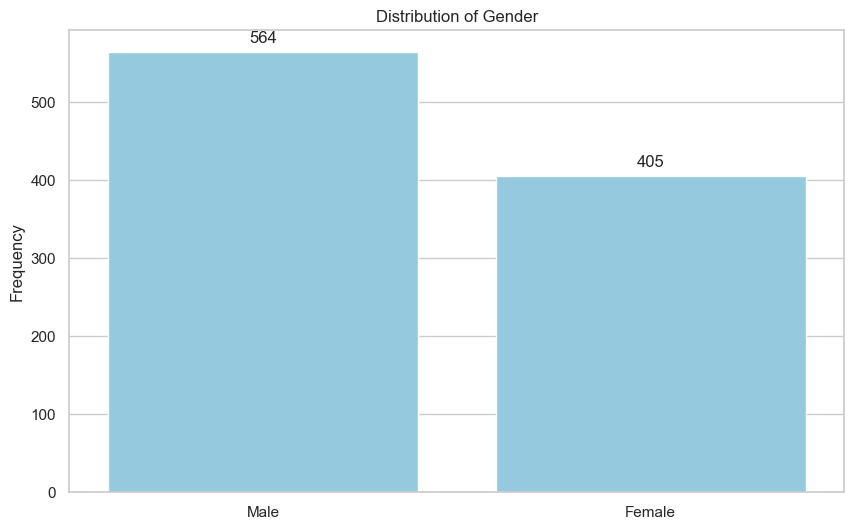

In [33]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = df['Gender'], color = 'skyblue')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Distribution of Gender")
plt.xlabel("")
plt.ylabel("Frequency")
plt.show()

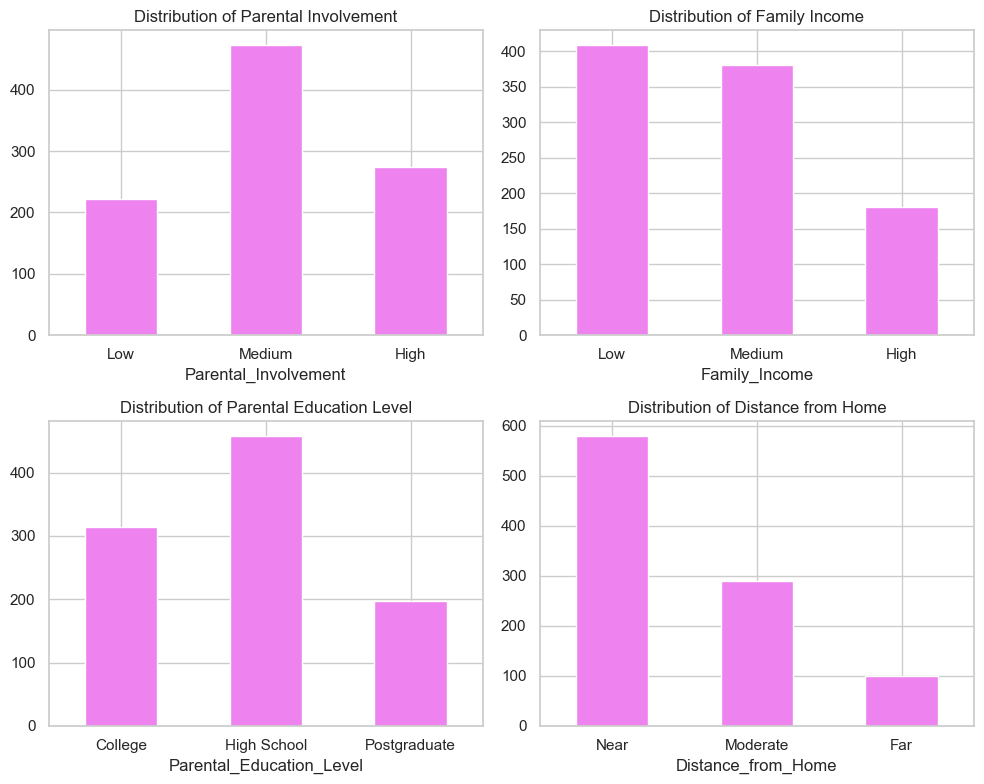

In [34]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))
columns = ['Parental_Involvement', 'Family_Income', 'Parental_Education_Level', 'Distance_from_Home']
for i, col in enumerate(columns):
    ax = axs[i//2, i % 2]
    if col in ['Parental_Involvement', 'Family_Income', 'Distance_from_Home']:
        sorted_values = df[col].value_counts().reindex(['Low', 'Medium', 'High', 'Near', 'Moderate', 'Far']).dropna()
    else:
        sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax, color="violet")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(f"Distribution of {col.replace("_", " ")}")

plt.tight_layout()
plt.show()

### Behavioral Data

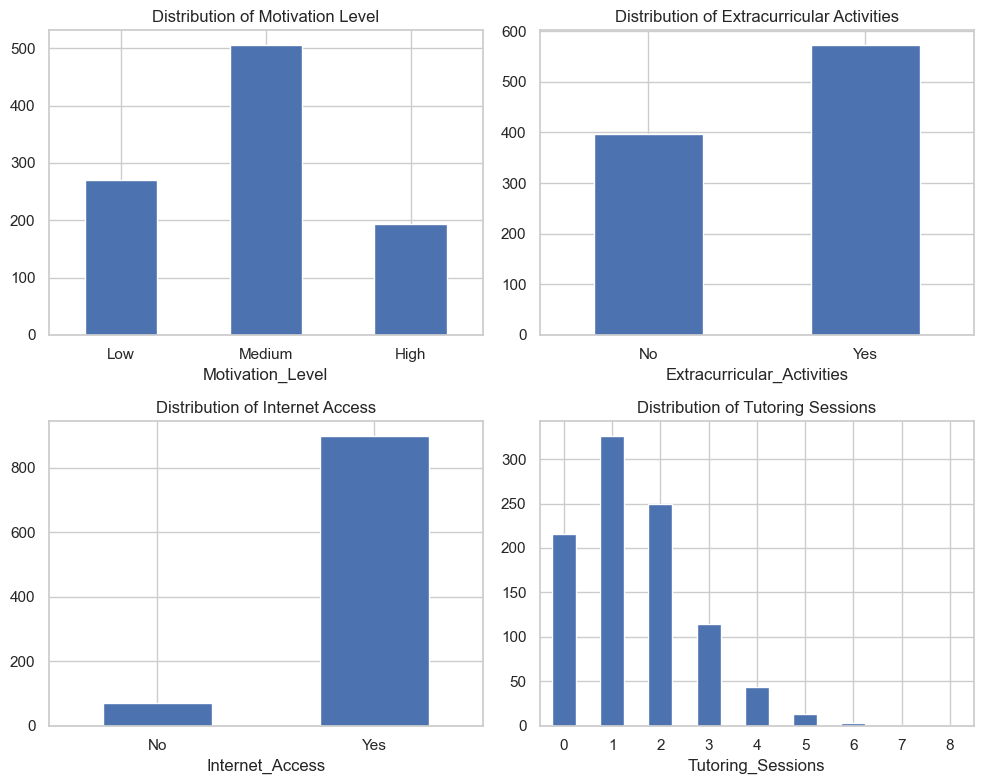

In [35]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))
columns = ['Motivation_Level', 'Extracurricular_Activities', 'Internet_Access', 'Tutoring_Sessions']
for i, col in enumerate(columns):
    ax = axs[i//2, i % 2]
    if col in ["Motivation_Level"]:
        sorted_values = df[col].value_counts().reindex(['Low', 'Medium', 'High']).dropna()
    else:
        sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(f"Distribution of {col.replace("_", " ")}")

plt.tight_layout()
plt.show()

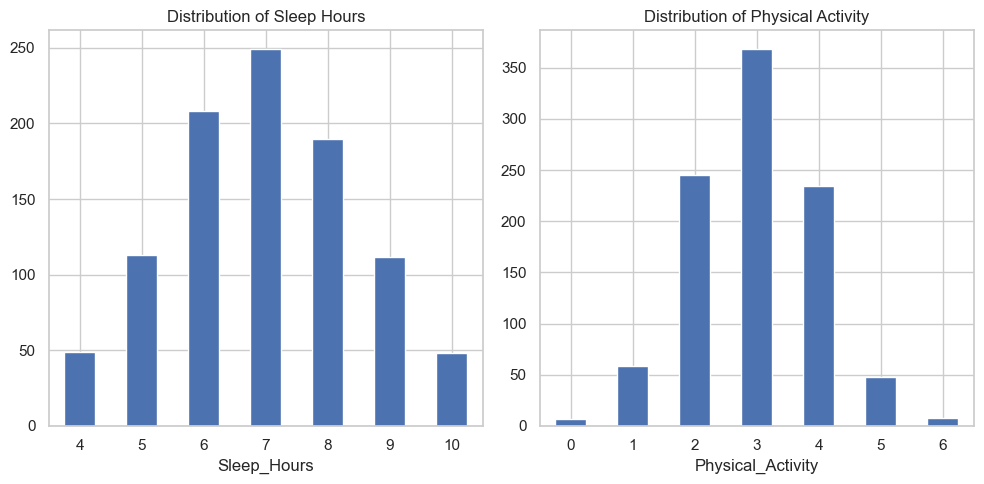

In [36]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
columns = ['Sleep_Hours', 'Physical_Activity']
for i, col in enumerate(columns):
    ax = axs[i]
    sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(f"Distribution of {col.replace("_", " ")}")

plt.tight_layout()
plt.show()

### Institutional Data 
Note: Public/Private School doesn't matter, so ignore `School_Type`

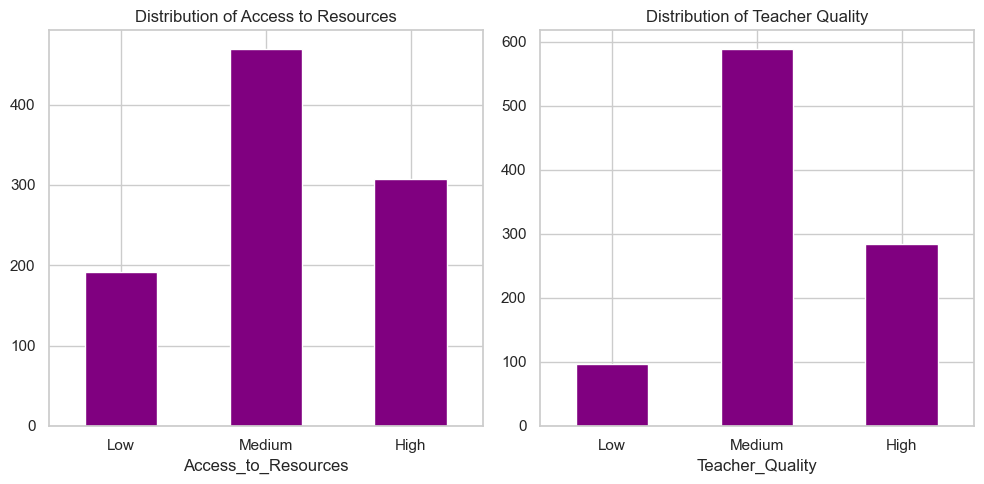

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
columns = ['Access_to_Resources', 'Teacher_Quality']
for i, col in enumerate(columns):
    ax = axs[i]
    if col in ['Access_to_Resources', 'Teacher_Quality']:
        sorted_values = df[col].value_counts().reindex(['Low', 'Medium', 'High']).dropna()
    else:
        sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax, color = "purple")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(f"Distribution of {col.replace("_", " ")}")

plt.tight_layout()
plt.show()

### Social and Environmental Data

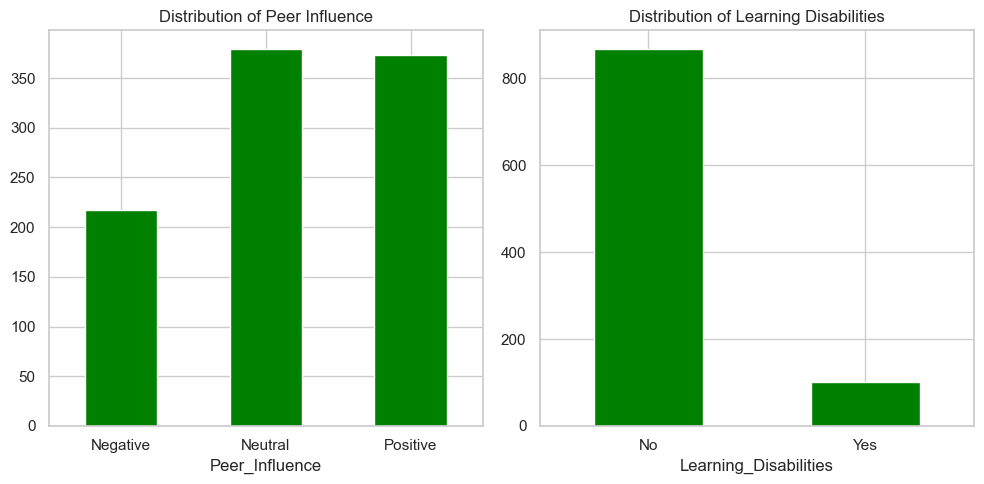

In [38]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
columns = ['Peer_Influence', 'Learning_Disabilities']
for i, col in enumerate(columns):
    ax = axs[i]
    sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax, color = "green")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=  0)
    ax.set_title(f"Distribution of {col.replace('_', ' ')}")

plt.tight_layout()
plt.show()

### Academic Data

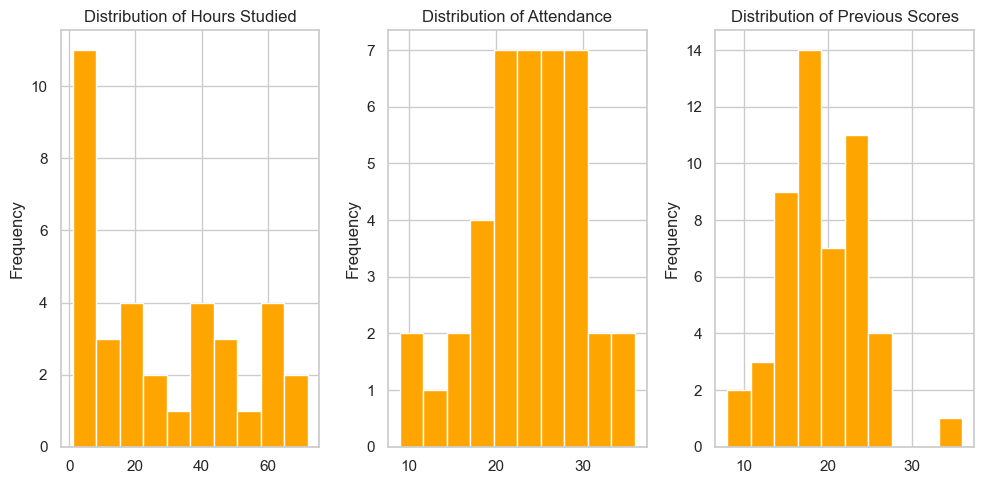

In [39]:
fig, axs = plt.subplots(1, 3, figsize = (10, 5))
columns = ['Hours_Studied', 'Attendance', 'Previous_Scores']
for i, col in enumerate(columns):
    ax = axs[i]
    sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='hist', ax=ax, color = "orange")
    ax.set_title(f"Distribution of {col.replace('_', ' ')}")

plt.tight_layout()
plt.show()

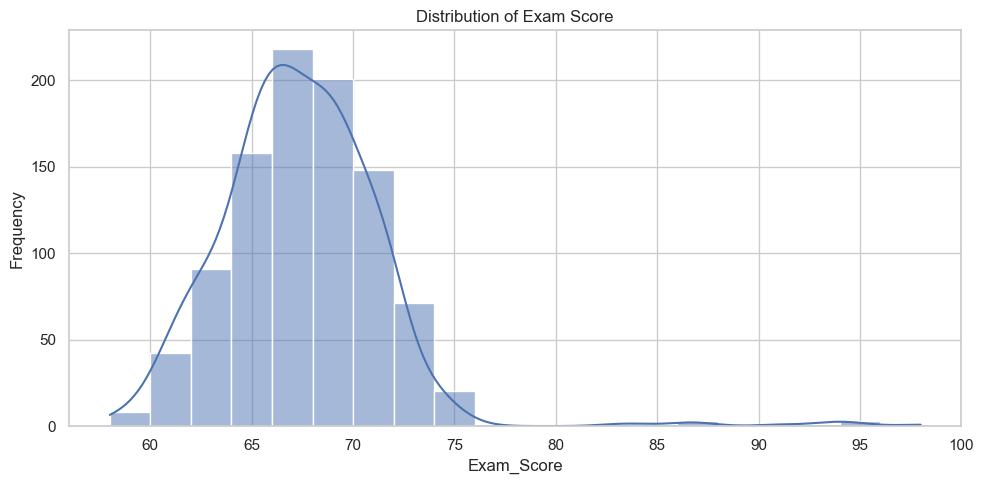

In [40]:
plt.figure(figsize = (10, 5))
col = "Exam_Score"
sns.histplot(data = df[col], kde = True, bins = 20)
plt.title(f"Distribution of {col.replace('_', ' ')}")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Summary Statistics

In [41]:
quantitative_vars = ['Hours_Studied', 'Sleep_Hours', 'Attendance', 'Previous_Scores', 
                     'Tutoring_Sessions', 'Exam_Score']
quant_summary = df[quantitative_vars].describe()

In [42]:
quant_summary

,Hours_Studied,Sleep_Hours,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,20.067079,6.976264,80.252838,75.076367,1.491228,67.396285
std,5.843397,1.497399,11.755650,14.374577,1.226505,4.127341
min,1.000000,4.000000,60.000000,50.000000,0.000000,58.000000
25%,16.000000,6.000000,70.000000,63.000000,1.000000,65.000000
50%,20.000000,7.000000,80.000000,75.000000,1.000000,67.000000
75%,24.000000,8.000000,91.000000,88.000000,2.000000,70.000000
max,36.000000,10.000000,100.000000,100.000000,8.000000,98.000000
